In [2]:
import warnings
import pandas as pd
import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력시
import seaborn as sns
from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline 
#그래프 시각화 옵션
mpl.rc('font',family='Malgun Gothic')
#글씨 선명히
set_matplotlib_formats
#음수 처리
mpl.rc('axes',unicode_minus=False)
#matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
table1 = pd.read_csv("./test/201701.csv")
table1.head().T
# column, index, value가 가장 중요
pd.options.display.max_columns=100

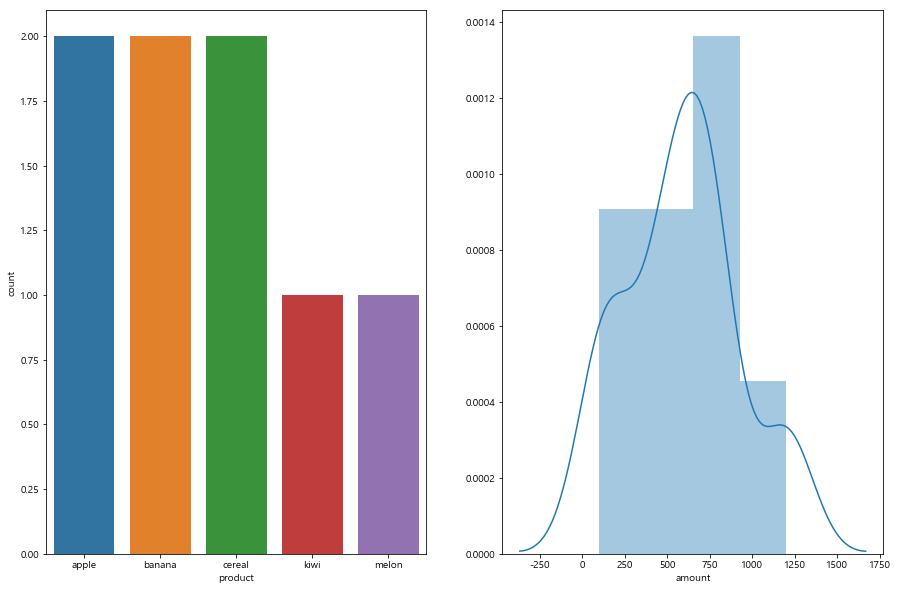

In [7]:
figure, ((ax1,ax2))=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,10)
sns.countplot(table1['product'],ax=ax1)
sns.distplot(table1['amount'],ax=ax2)

# Date

In [12]:
table1['date']

0    2017-01-01
1    2017-01-03
2    2017-01-05
3    2017-01-07
4    2017-01-08
5    2017-01-09
6    2017-01-09
7    2017-01-10
Name: date, dtype: object

In [13]:
table1['date(clean)'] = pd.to_datetime(table1['date'])
table1

,Name,date,amount,product,result,date(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05
3,Park,2017-01-07,500,cereal,canceled,2017-01-07
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10


In [14]:
table1['date(clean)'].dt.month

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
Name: date(clean), dtype: int64

In [15]:
table1['date(clean)'].dt.weekday_name

0      Sunday
1     Tuesday
2    Thursday
3    Saturday
4      Sunday
5      Monday
6      Monday
7     Tuesday
Name: date(clean), dtype: object

In [19]:
table1['date(month)'] = table1['date(clean)'].dt.month
table1['date(day)'] = table1['date(clean)'].dt.day
table1['date(day_of_week)'] = table1['date(clean)'].dt.weekday_name
table1[['date(month)','date(day)','date(day_of_week)']].head()

,date(month),date(day),date(day_of_week)
0,1,1,Sunday
1,1,3,Tuesday
2,1,5,Thursday
3,1,7,Saturday
4,1,8,Sunday


# Replace

In [20]:
table1['result']

0    confirmed
1    confirmed
2    confirmed
3     canceled
4    confirmed
5    confirmed
6    confirmed
7     canceled
Name: result, dtype: object

In [23]:
table1['result(clean)'] = table1['result'].replace('confirmed','확인').replace('canceled','취소')
table1[['result','result(clean)']]

,result,result(clean)
0,confirmed,확인
1,confirmed,확인
2,confirmed,확인
3,canceled,취소
4,confirmed,확인
5,confirmed,확인
6,confirmed,확인
7,canceled,취소


# Apply
- **DataFrame Handling에 있어서 강력한 함수**

In [30]:
def num(data):
    return data == 'apple'
table1['product'].apply(num)

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7    False
Name: product, dtype: bool